In [2]:

%matplotlib inline
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Add the Functions folder to Python path
sys.path.append("../Functions")  # adjust if needed

from functions import filter_data, plot_indicator

#https://docs.google.com/spreadsheets/d/1BJYCRpalLJLO5wHX488KBdcf-26NAc0nTkngKodzUYA/export?format=csv
df_url = "https://docs.google.com/spreadsheets/d/1E0lyCSxlC0ajNtzjpWo17TX5DEeEjd33E-j6c7fOBcg/export?format=csv"
df = pd.read_csv(df_url)
df.columns = [c.strip() for c in df.columns]

In [3]:
df

,Country Name,Indicator Name,Year,Value
0,United States,National savings (% GDP),1980,22.059
1,United States,Unemployment levels (%),1980,7.175
2,United States,GDP per capita,1980,12552.943
3,United States,"Inflation (CPI, %))",1980,86.750
4,Germany,Unemployment levels (%),1980,3.359
...,...,...,...,...
5224,Indonesia,"Birth rate, crude (per 1,000 people)",2024,NaN
5225,Japan,"Birth rate, crude (per 1,000 people)",2024,NaN
5226,Poland,"Birth rate, crude (per 1,000 people)",2024,NaN
5227,United States,"Birth rate, crude (per 1,000 people)",2024,NaN


In [4]:
df['Indicator Name'].value_counts()

Indicator Name
Urban population (% of total population)                               540
Gini index                                                             540
Life expectancy at birth, total (years)                                540
Current health expenditure (% of GDP)                                  540
Poverty headcount ratio at national poverty lines (% of population)    540
Birth rate, crude (per 1,000 people)                                   540
National savings (% GDP)                                               510
GDP per capita                                                         510
Inflation (CPI, %))                                                    510
Unemployment levels (%)                                                459
Name: count, dtype: int64

In [5]:

# Pivot to get indicators as columns
pivot = df.pivot_table(
    index=["Country Name", "Year"],
    columns="Indicator Name",
    values="Value"
).reset_index()

# Rename columns:
pivot = pivot.rename(columns={
    "Gini index": "gini",
    "Life expectancy at birth, total (years)": "life_expectancy",
    "Birth rate, crude (per 1,000 people)": "birth_rate"
})




In [6]:

pivot

Indicator Name,Country Name,Year,birth_rate,Current health expenditure (% of GDP),GDP per capita,gini,"Inflation (CPI, %))",life_expectancy,National savings (% GDP),Poverty headcount ratio at national poverty lines (% of population),Unemployment levels (%),Urban population (% of total population)
0,Chile,1980,23.234,NaN,2598.159,NaN,4.039,69.475,12.366,NaN,11.502,81.243
1,Chile,1981,22.951,NaN,3025.972,NaN,4.490,69.822,7.870,NaN,10.291,81.778
2,Chile,1982,22.721,NaN,2219.964,NaN,5.419,70.291,1.467,NaN,19.814,82.226
3,Chile,1983,22.588,NaN,1774.676,NaN,6.688,70.830,4.082,NaN,20.999,82.359
4,Chile,1984,22.533,NaN,1698.949,NaN,8.267,71.215,2.296,NaN,17.515,82.492
...,...,...,...,...,...,...,...,...,...,...,...,...
595,United States,2026,NaN,NaN,92883.466,NaN,333.626,NaN,17.578,NaN,4.119,NaN
596,United States,2027,NaN,NaN,95960.741,NaN,341.898,NaN,17.724,NaN,3.992,NaN
597,United States,2028,NaN,NaN,99125.655,NaN,349.436,NaN,17.813,NaN,3.918,NaN
598,United States,2029,NaN,NaN,102275.842,NaN,357.123,NaN,17.724,NaN,3.824,NaN


In [7]:
pivot_econ_wellbeing = pivot[[
    "Country Name",
    "Year",
    "gini",
    "life_expectancy",
    "birth_rate",
    "GDP per capita",
    "Inflation (CPI, %))",
    "Unemployment levels (%)"
]]


In [8]:
pivot_econ_wellbeing

Indicator Name,Country Name,Year,gini,life_expectancy,birth_rate,GDP per capita,"Inflation (CPI, %))",Unemployment levels (%)
0,Chile,1980,NaN,69.475,23.234,2598.159,4.039,11.502
1,Chile,1981,NaN,69.822,22.951,3025.972,4.490,10.291
2,Chile,1982,NaN,70.291,22.721,2219.964,5.419,19.814
3,Chile,1983,NaN,70.830,22.588,1774.676,6.688,20.999
4,Chile,1984,NaN,71.215,22.533,1698.949,8.267,17.515
...,...,...,...,...,...,...,...,...
595,United States,2026,NaN,NaN,NaN,92883.466,333.626,4.119
596,United States,2027,NaN,NaN,NaN,95960.741,341.898,3.992
597,United States,2028,NaN,NaN,NaN,99125.655,349.436,3.918
598,United States,2029,NaN,NaN,NaN,102275.842,357.123,3.824


In [12]:
pivot_econ_wellbeing = pivot_econ_wellbeing[pivot_econ_wellbeing["Year"].between(2000, 2023)]

In [13]:
pivot_econ_wellbeing

Indicator Name,Country Name,Year,gini,life_expectancy,birth_rate,GDP per capita,"Inflation (CPI, %))",Unemployment levels (%)
20,Chile,2000,52.8,77.128000,16.322,5099.922,57.794,9.708
21,Chile,2001,NaN,77.580000,15.914,4608.057,59.317,9.867
22,Chile,2002,NaN,77.840000,15.249,4479.771,60.993,9.800
23,Chile,2003,51.5,77.884000,14.789,4824.870,61.647,9.533
24,Chile,2004,NaN,78.276000,14.415,6183.906,63.144,10.017
...,...,...,...,...,...,...,...,...
588,United States,2019,41.9,78.787805,11.400,65561.320,258.353,3.675
589,United States,2020,40.0,76.980488,10.900,64518.063,262.389,8.100
590,United States,2021,39.7,76.329268,11.000,71365.337,281.782,5.358
591,United States,2022,41.7,77.434146,11.000,77944.095,299.845,3.642


In [14]:
# List the countries you want to remove
countries_to_drop = ['China', 'Ghana', "Cote d'Ivoire", 'Poland']

# Filter the DataFrame:
# The .isin() method checks if the 'Country Name' is in the list.
# The '~' (tilde) negates the result, keeping only the rows that are NOT in the list.
pivot_econ_wellbeing = pivot_econ_wellbeing[~pivot_econ_wellbeing['Country Name'].isin(countries_to_drop)]

# Now pivot_well_being contains data only for the remaining countries

In [15]:
#imputing
pivot_econ_wellbeing = pivot_econ_wellbeing.sort_values(["Country Name", "Year"])


In [19]:
#FFill und BFILL 

# Define the list of columns to be imputed
all_cols_to_impute = [
    "gini", 
    "life_expectancy", 
    "birth_rate", 
    "GDP per capita", 
    "Inflation (CPI, %))",
    "Unemployment levels (%)"
]

# Apply Grouped Interpolation and Imputation
pivot_econ_wellbeing[all_cols_to_impute] = (
    pivot_econ_wellbeing
    .groupby("Country Name")[all_cols_to_impute]
    .apply(lambda x: x.interpolate(method="linear").ffill().bfill())
    .reset_index(level=0, drop=True)
)

In [21]:
pivot_econ_wellbeing.head(5)

Indicator Name,Country Name,Year,gini,life_expectancy,birth_rate,GDP per capita,"Inflation (CPI, %))",Unemployment levels (%)
20,Chile,2000,52.800000,77.128,16.322,5099.922,57.794,9.708
21,Chile,2001,52.366667,77.580,15.914,4608.057,59.317,9.867
22,Chile,2002,51.933333,77.840,15.249,4479.771,60.993,9.800
23,Chile,2003,51.500000,77.884,14.789,4824.870,61.647,9.533
24,Chile,2004,50.233333,78.276,14.415,6183.906,63.144,10.017


In [24]:
pivot_econ_wellbeing[["gini", 
    "life_expectancy", 
    "birth_rate", 
    "GDP per capita", 
    "Inflation (CPI, %))",
    "Unemployment levels (%)"]].isna().sum()


Indicator Name
gini                       0
life_expectancy            0
birth_rate                 0
GDP per capita             0
Inflation (CPI, %))        0
Unemployment levels (%)    0
dtype: int64

In [28]:
!pip3 install scikit-learn

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ---- 1. Reverse Gini so that higher = better (less inequality) ----
pivot_econ_wellbeing["gini_rev"] = -pivot_econ_wellbeing["gini"]
pivot_econ_wellbeing["Unemployment_rev"] = -pivot_econ_wellbeing["Unemployment levels (%)"]
pivot_econ_wellbeing["Inflation_rev"] = -pivot_econ_wellbeing["Inflation (CPI, %))"]

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [29]:
#reversing for PCA WELLBEING 

# ---- 2. Select the (reversed) indicators for PCA ----
X = pivot_econ_wellbeing[["gini_rev", "life_expectancy", "birth_rate"]]

# ---- 3. Standardize (normalize) all indicators ----
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---- 4. PCA on normalized values ----
pca = PCA(n_components=1)
pca.fit(X_scaled)

# ---- 5. Extract PC1 loadings ----
loadings = pca.components_[0]

# ---- 6. Convert loadings → absolute, normalized weights ----
weights = np.abs(loadings) / np.sum(np.abs(loadings))

weights_df_new = pd.DataFrame({
    "indicator_wb": ["gini_rev", "life_expectancy", "birth_rate"],
    "weight_wb": weights
})

print("PCA Weights Well Being:")
display(weights_df_new)

# ---- 7. Compute PCA well-being score ----
pivot_econ_wellbeing["score_pca_wellbeing"] = (
    weights[0] * X_scaled[:, 0] +
    weights[1] * X_scaled[:, 1] +
    weights[2] * X_scaled[:, 2]
)


PCA Weights Well Being:


,indicator_wb,weight_wb
0,gini_rev,0.303682
1,life_expectancy,0.344527
2,birth_rate,0.351791


In [34]:


pivot_econ_wellbeing[["Country Name", "Year", "gini_rev", "life_expectancy", "birth_rate","score_pca_wellbeing"]].head()


Indicator Name,Country Name,Year,gini_rev,life_expectancy,birth_rate,score_pca_wellbeing
20,Chile,2000,-52.800000,77.128,16.322,-0.077586
21,Chile,2001,-52.366667,77.580,15.914,-0.075287
22,Chile,2002,-51.933333,77.840,15.249,-0.101269
23,Chile,2003,-51.500000,77.884,14.789,-0.121966
24,Chile,2004,-50.233333,78.276,14.415,-0.097261


In [36]:
pivot_wellbeing = pivot_econ_wellbeing
pivot_wellbeing.head()

Indicator Name,Country Name,Year,gini,life_expectancy,birth_rate,GDP per capita,"Inflation (CPI, %))",Unemployment levels (%),gini_rev,Unemployment_rev,Inflation_rev,score_pca_new,score_pca_wellbeing,score_pca_economics
20,Chile,2000,52.800000,77.128,16.322,5099.922,57.794,9.708,-52.800000,-9.708,-57.794,-0.046571,-0.077586,-0.605998
21,Chile,2001,52.366667,77.580,15.914,4608.057,59.317,9.867,-52.366667,-9.867,-59.317,-0.045167,-0.075287,-0.598401
22,Chile,2002,51.933333,77.840,15.249,4479.771,60.993,9.800,-51.933333,-9.800,-60.993,-0.058756,-0.101269,-0.593036
23,Chile,2003,51.500000,77.884,14.789,4824.870,61.647,9.533,-51.500000,-9.533,-61.647,-0.069538,-0.121966,-0.594194
24,Chile,2004,50.233333,78.276,14.415,6183.906,63.144,10.017,-50.233333,-10.017,-63.144,-0.055879,-0.097261,-0.542272


In [31]:
#reversing for PCA ECONOMICS

# ---- 2. Select the (reversed) indicators for PCA ----
X = pivot_econ_wellbeing[["GDP per capita", "Inflation (CPI, %))", "Unemployment levels (%)"]]

# ---- 3. Standardize (normalize) all indicators ----
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---- 4. PCA on normalized values ----
pca = PCA(n_components=1)
pca.fit(X_scaled)

# ---- 5. Extract PC1 loadings ----
loadings = pca.components_[0]

# ---- 6. Convert loadings → absolute, normalized weights ----
weights = np.abs(loadings) / np.sum(np.abs(loadings))

weights_df_new_econ = pd.DataFrame({
    "indicator_econ": ["GDP per capita", "Inflation (CPI, %))", "Unemployment levels (%)"],
    "weight_econ": weights
})

print("PCA Weights Well Being:")
display(weights_df_new_econ)

# ---- 7. Compute PCA well-being score ----
pivot_econ_wellbeing["score_pca_economics"] = (
    weights[0] * X_scaled[:, 0] +
    weights[1] * X_scaled[:, 1] +
    weights[2] * X_scaled[:, 2]
)

PCA Weights Well Being:


,indicator_econ,weight_econ
0,GDP per capita,0.368617
1,"Inflation (CPI, %))",0.335869
2,Unemployment levels (%),0.295514


In [37]:
pivot_econ_wellbeing[["Country Name", "Year", "GDP per capita", "Inflation (CPI, %))", "Unemployment levels (%)", "score_pca_economics","gini_rev", "life_expectancy", "birth_rate","score_pca_wellbeing"]].head()


Indicator Name,Country Name,Year,GDP per capita,"Inflation (CPI, %))",Unemployment levels (%),score_pca_economics,gini_rev,life_expectancy,birth_rate,score_pca_wellbeing
20,Chile,2000,5099.922,57.794,9.708,-0.605998,-52.800000,77.128,16.322,-0.077586
21,Chile,2001,4608.057,59.317,9.867,-0.598401,-52.366667,77.580,15.914,-0.075287
22,Chile,2002,4479.771,60.993,9.800,-0.593036,-51.933333,77.840,15.249,-0.101269
23,Chile,2003,4824.870,61.647,9.533,-0.594194,-51.500000,77.884,14.789,-0.121966
24,Chile,2004,6183.906,63.144,10.017,-0.542272,-50.233333,78.276,14.415,-0.097261


In [39]:
final_df = pivot_econ_wellbeing[[
    'Country Name', 
    'Year', 
    'score_pca_economics', 
    'score_pca_wellbeing'
]].copy()

In [41]:
final_df

Indicator Name,Country Name,Year,score_pca_economics,score_pca_wellbeing
20,Chile,2000,-0.605998,-0.077586
21,Chile,2001,-0.598401,-0.075287
22,Chile,2002,-0.593036,-0.101269
23,Chile,2003,-0.594194,-0.121966
24,Chile,2004,-0.542272,-0.097261
...,...,...,...,...
588,United States,2019,1.392535,-0.073089
589,United States,2020,1.581552,-0.143536
590,United States,2021,1.702938,-0.158342
591,United States,2022,1.853811,-0.161027


In [44]:
import plotly.express as px

In [45]:
final_df = final_df.sort_values(by=['Country Name', 'Year'])

# --- Plotly Visualization ---
fig = px.line(
    final_df, 
    x='score_pca_economics', 
    y='score_pca_wellbeing', 
    color='Country Name',
    hover_data={'Year': True, 'score_pca_economics': ':.2f', 'score_pca_wellbeing': ':.2f'},
    line_group='Country Name',
    title='Economic vs. Wellbeing PCA Scores',
)

# Add markers (points) to the line plot for individual year visibility
fig.update_traces(
    mode='lines+markers', 
    marker={'size': 10},
    line={'width': 2.5}
)

# Final layout adjustments for clarity
fig.update_layout(
    xaxis_title='PCA Score (Economics)',
    yaxis_title='PCA Score (Wellbeing)',
    legend_title='Country',
    # Enable zoom/pan functionality
    hovermode='closest' 
)

fig.show()

In [47]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [50]:
final_df = final_df.sort_values(by=['Country Name', 'Year'])

# 1. Create a figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

countries = final_df['Country Name'].unique()
# Use a Plotly Express palette to generate unique colors for each country
country_colors = px.colors.qualitative.Plotly
country_color_map = {country: country_colors[i % len(country_colors)] for i, country in enumerate(countries)}

# 2. Iterate through countries and add two traces for each country
for country in countries:
    df_country = final_df[final_df['Country Name'] == country]
    color = country_color_map[country]
    
    # --- Economic Score Trace (Primary Y-axis, SOLID line) ---
    fig.add_trace(
        go.Scatter(
            x=df_country['Year'], 
            y=df_country['score_pca_economics'], 
            name=f'{country} (Economic)',
            mode='lines+markers',
            marker=dict(symbol='circle', size=8, color=color),
            line=dict(dash='solid', color=color, width=2.5),
            legendgroup=country, # Ensures both lines for the country stay together
            showlegend=True 
        ),
        secondary_y=False,  # Primary Y-axis
    )

    # --- Wellbeing Score Trace (Secondary Y-axis, DOTTED line) ---
    fig.add_trace(
        go.Scatter(
            x=df_country['Year'], 
            y=df_country['score_pca_wellbeing'], 
            name=f'{country} (Wellbeing)',
            mode='lines+markers',
            marker=dict(symbol='square', size=8, color=color),
            line=dict(dash='dot', color=color, width=2.5),
            legendgroup=country,
            showlegend=True 
        ),
        secondary_y=True,  # Secondary Y-axis
    )

# 3. Update Axes and Layout
fig.update_layout(
    title_text='PCA Score Trends Over Time: Country Colors & Score Line Styles',
    xaxis_title='Year',
    hovermode='x unified',
    height=600,
    legend_title='Country (Score Type)',
)

# Set up the Primary (Left) Y-axis
fig.update_yaxes(
    title_text="<b>Economic Score</b> (Solid Line)", 
    secondary_y=False,
    showgrid=True,
)

# Set up the Secondary (Right) Y-axis
fig.update_yaxes(
    title_text="<b>Wellbeing Score</b> (Dotted Line)", 
    secondary_y=True,
    showgrid=False,
)

fig.show()

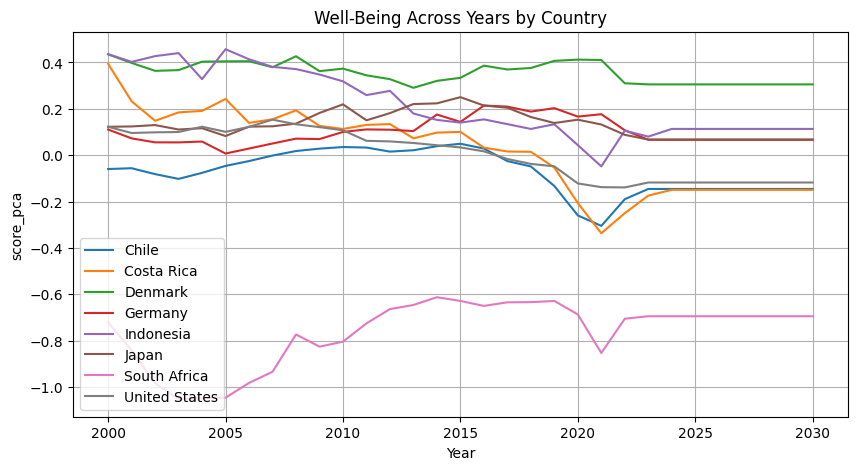

In [ ]:
plt.figure(figsize=(10, 5))

for country, group in pivot_econ_wellbeing.groupby("Country Name"):
    plt.plot(group["Year"], group["score_pca"], label=country)

plt.xlabel("Year")
plt.ylabel("score_pca")
plt.title("Well-Being Across Years by Country")
plt.legend()
plt.grid(True)

plt.show()

In [984]:
pivot_well_being["score_pca_pos"] = (
    pivot_well_being["score_pca"] - pivot_well_being["score_pca"].min()
) / (
    pivot_well_being["score_pca"].max() - pivot_well_being["score_pca"].min()
)


In [ ]:

pivot_well_being

Indicator Name,Country Name,Year,gini,life_expectancy,birth_rate,score,gini_rev,score_pca,score_pca_pos
20,Chile,2000,52.800000,77.128000,16.322,57.668400,-52.800000,-0.059412,0.657753
21,Chile,2001,52.366667,77.580000,15.914,57.682800,-52.366667,-0.056055,0.659977
22,Chile,2002,51.933333,77.840000,15.249,57.549800,-51.933333,-0.081469,0.643142
23,Chile,2003,51.500000,77.884000,14.789,57.349800,-51.500000,-0.102009,0.629535
24,Chile,2004,50.233333,78.276000,14.415,57.091000,-50.233333,-0.076004,0.646762
...,...,...,...,...,...,...,...,...,...
595,United States,2026,41.800000,78.385366,10.700,53.872683,-41.800000,-0.117630,0.619188
596,United States,2027,41.800000,78.385366,10.700,53.872683,-41.800000,-0.117630,0.619188
597,United States,2028,41.800000,78.385366,10.700,53.872683,-41.800000,-0.117630,0.619188
598,United States,2029,41.800000,78.385366,10.700,53.872683,-41.800000,-0.117630,0.619188


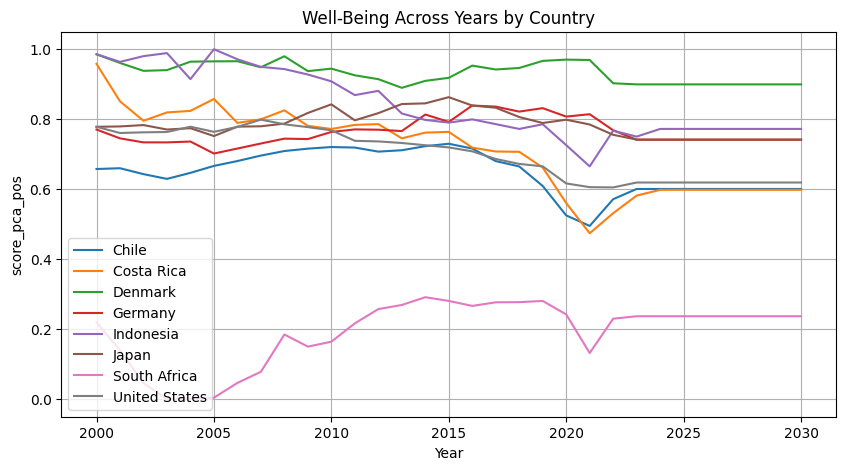

In [991]:
plt.figure(figsize=(10, 5))

for country, group in pivot_well_being.groupby("Country Name"):
    plt.plot(group["Year"], group["score_pca_pos"], label=country)

plt.xlabel("Year")
plt.ylabel("score_pca_pos")
plt.title("Well-Being Across Years by Country")
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# 4. Recode directionality and standardize to prepare data for principal component analysis
X_econ = df_esi[[‘GDP’, ‘UNEMP’, ‘INFLATION’]].copy()
# 4.1 Invert the unemployment and inflation indicators by multiplying by -1.
X_econ_recoded = X_econ.copy()
X_econ_recoded[‘UNEMP’] = X_econ_recoded[‘UNEMP’] * -1
X_econ_recoded[‘INFLATION’] = X_econ_recoded[‘INFLATION’] * -1
# 4.2 Standardize (Z-score) the recoded data.
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_econ_recoded)
# 5. Apply principal component analysis
# 5.1 Initialize PCA
pca_econ = PCA()
pca_econ.fit(X_standardized)
# 5.2 Transform the standardized data to get the scores for each country-year
PC_scores = pca_esi.transform(X_standardized)
# 5.4 The first Principal Component (PC1) is the Economic Success Indicator
df_econ_working[‘Economic Success (PCA)’] = PC_scores[:, 0]
# 5.5 REVIEW PCA OUTPUT (Crucial for Documentation) ---
print(“--- DataFrame Head with Economic Success (PCA) Score ---“)
print(df_econ_working[[‘Country Name’, ‘Year’, ‘Economic Success (PCA)’]].head())
print(“\n--- PCA Loadings (Weights for ESI) ---“)
# These loadings are the statistically optimal weights for your ESI
loadings = pd.Series(pca_esi.components_[0], index=X_econ_recoded.columns)
print(loadings)
print(“\n--- Explained Variance Ratio ---“)
# This tells you the percentage of total variance the ESI captures.
# The first number in the array is the most important: the percentage explained by PC1.
print(pca_esi.explained_variance_ratio_)






